In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
netflix_rating = pd.read_csv("netflix_ratings_data.csv")
netflix_rating = netflix_rating[netflix_rating.year >= 2000]

In [3]:
rating_time = pd.DataFrame([netflix_rating.type, netflix_rating.genres, netflix_rating.year, netflix_rating.averageRating]).transpose()

In [4]:
movie_rating = rating_time[rating_time.type == "Movie"].groupby('year').averageRating.mean()
tvshow_rating = rating_time[rating_time.type == "TV Show"].groupby('year').averageRating.mean()

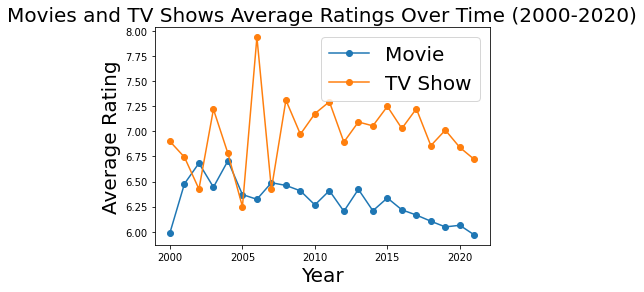

In [5]:
plt.plot(movie_rating.index, movie_rating, 'o-')
plt.plot(tvshow_rating.index, tvshow_rating, 'o-')
plt.title(label = 'Movies and TV Shows Average Ratings Over Time (2000-2020)', fontsize = 20)
plt.legend(labels = ['Movie', 'TV Show'], fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.savefig('line_plot_ratings_types.png')

#Reference: https://jovian.ai/jandrewtomich/new-netflix-and-imdb-analysis?fbclid=IwAR3Oy2nvoLm61Hk2JQySuOxDxzZpU9ArF4EFQSY0OcddSGRsjuXPqggC_zE

In [6]:
netflix_genre = pd.DataFrame([netflix_rating.genres, netflix_rating.year, netflix_rating.averageRating]).transpose()
netflix_genre['genres'] = netflix_genre['genres'].str.split("\\s*,\\s*")
netflix_genre = netflix_genre.explode('genres')

reduced_genres = netflix_genre.groupby('genres').size().reset_index(name='count')
reduced_genres = reduced_genres[reduced_genres['count'] <= 500]
removed_genres = reduced_genres['genres'].to_list()

netflix_genre = netflix_genre.groupby(['genres', 'year']).averageRating.mean()
netflix_genre = netflix_genre.drop(index=removed_genres).reset_index()
netflix_genre

,genres,year,averageRating
0,Action,2000,6.000000
1,Action,2001,6.266667
2,Action,2002,6.776190
3,Action,2003,6.731818
4,Action,2004,6.758824
...,...,...,...
169,Thriller,2017,5.959091
170,Thriller,2018,5.532673
171,Thriller,2019,5.583750
172,Thriller,2020,5.942466


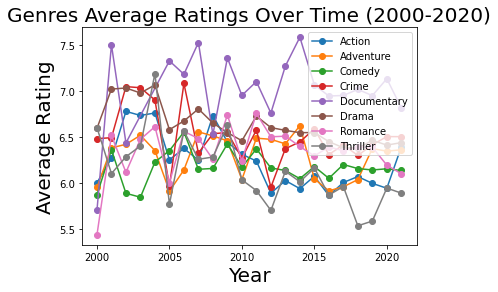

In [7]:
fig, ax = plt.subplots()

for key, grp in netflix_genre.groupby('genres'):
    ax = grp.plot(ax=ax, kind='line', x='year', y='averageRating',label=key, style='o-')

plt.rcParams["figure.figsize"] = (30,10)

plt.legend(loc='best')

plt.title(label = 'Genres Average Ratings Over Time (2000-2020)', fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.savefig('line_plot_ratings_genres.png')
